In [10]:
import pandas as pd
import nibabel as nib
import numpy as np

# Set the TR in seconds
TR = 2

# Load the preprocessed fMRI data for the movie run
fmri_file = 'subjects/sub-01/func/sub-01_ses-movie_task-movie_run-1_bold.nii.gz'
fmri_data = nib.load(fmri_file).get_fdata()

# Load the preprocessed fMRI data for the movie run
fmri_file = 'subjects/sub-01/func/sub-01_ses-movie_task-movie_run-2_bold.nii.gz'
fmri_data2 = nib.load(fmri_file).get_fdata()

# Load the preprocessed fMRI data for the movie run
fmri_file = 'subjects/sub-01/func/sub-01_ses-movie_task-movie_run-3_bold.nii.gz'
fmri_data3= nib.load(fmri_file).get_fdata()

# Load the preprocessed fMRI data for the movie run
fmri_file = 'subjects/sub-01/func/sub-01_ses-movie_task-movie_run-4_bold.nii.gz'
fmri_data4 = nib.load(fmri_file).get_fdata()

# Load the preprocessed fMRI data for the movie run
fmri_file = 'subjects/sub-01/func/sub-01_ses-movie_task-movie_run-5_bold.nii.gz'
fmri_data5 = nib.load(fmri_file).get_fdata()

# Load the preprocessed fMRI data for the movie run
fmri_file = 'subjects/sub-01/func/sub-01_ses-movie_task-movie_run-6_bold.nii.gz'
fmri_data6 = nib.load(fmri_file).get_fdata()

# Load the preprocessed fMRI data for the movie run
fmri_file = 'subjects/sub-01/func/sub-01_ses-movie_task-movie_run-7_bold.nii.gz'
fmri_data7 = nib.load(fmri_file).get_fdata()

# Load the preprocessed fMRI data for the movie run
fmri_file = 'subjects/sub-01/func/sub-01_ses-movie_task-movie_run-8_bold.nii.gz'
fmri_data8 = nib.load(fmri_file).get_fdata()

print((fmri_data.shape[3]*2)/60, (fmri_data2.shape[3]*2)/60, (fmri_data3.shape[3]*2)/60, (fmri_data4.shape[3]*2)/60, (fmri_data5.shape[3]*2)/60, (fmri_data6.shape[3]*2)/60, (fmri_data7.shape[3]*2)/60, (fmri_data8.shape[3]*2)/60)

15.033333333333333 14.7 14.6 16.266666666666666 15.4 14.633333333333333 18.066666666666666 11.266666666666667


In [11]:
print(fmri_data.shape[3], fmri_data2.shape[3], fmri_data3.shape[3], fmri_data4.shape[3], fmri_data5.shape[3], fmri_data6.shape[3], fmri_data7.shape[3], fmri_data8.shape[3])

451 441 438 488 462 439 542 338


In [17]:
#test output of the mask

mask_img = nib.load('/Users/strom/Desktop/fmri_project/mask/mask_occi.nii')
mask_data = mask_img.get_fdata()
print(mask_data.shape)
fmri_file = '/Users/strom/Desktop/fmri_project/subjects/sub-01/new_space/1/registered_volume_1.nii.gz'
test_output = nib.load(fmri_file).get_fdata()
print(test_output.shape)
        
masked_img = test_output
masked_data = np.multiply(masked_img, mask_data)
flat_masked_data_3 = masked_data[np.nonzero(mask_data)]
print(flat_masked_data_3.shape)

(91, 109, 91)
(91, 109, 91)
(36552,)


In [36]:
import cv2
import os

#here, extractiong the frames from the seg2

video_file = './inputs/seg2.mkv'
output_dir = './output/seg2/'

# Calculate the time interval between each fMRI volume (assuming TR=2s)
fmri_interval = 2.0

fps = 25.0
n_frames = 32 


if not os.path.exists(output_dir):
    os.makedirs(output_dir)

cap = cv2.VideoCapture(video_file)
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'Frames per second: {fps}')
interval = int((fps * 2)/32)  # Save 32 frames per 2 seconds
frame_num = 0
sample_num = 0


my_list = []
for i in range(fmri_data2.shape[3]):
    start_time = i * fmri_interval
    start_frame = int(start_time * 25.0)
    for j in range(32):
        add = ((fps*fmri_interval)/n_frames)*j
        my_list.append(int(start_frame + add))

frame_num_app = 0
sample_num = fmri_data.shape[3] + fmri_data2.shape[3]

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if int(frame_num) in my_list:
        i = frame_num // interval
        filename = f'{output_dir}frame_{sample_num+1:03d}_{frame_num_app+1:03d}.jpg'
        cv2.imwrite(filename, frame)
        frame_num_app += 1

    if frame_num_app == 32:
        frame_num_app = 0


    frame_num += 1
    if frame_num % 50 == 0:   
        sample_num += 1
    
    

cap.release()

Frames per second: 25.0


In [46]:
import cv2
import os

#here, extractiong the frames from the seg7, be careful to add the number of frames from previous runs (i.e sample runs)

video_file = './inputs/seg7.mkv'
output_dir = './output/seg7/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

cap = cv2.VideoCapture(video_file)
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'Frames per second: {fps}')
interval = int((fps * 2)/32)  # Save 32 frames per 2 seconds
frame_num = 0
sample_num = 0


my_list = []
for i in range(fmri_data8.shape[3]):
    start_time = i * fmri_interval
    start_frame = int(start_time * 25.0)
    for j in range(32):
        add = ((fps*fmri_interval)/n_frames)*j
        my_list.append(int(start_frame + add))

frame_num_app = 0
sample_num = fmri_data.shape[3] + fmri_data2.shape[3] + fmri_data3.shape[3] + fmri_data4.shape[3] + fmri_data5.shape[3] + fmri_data6.shape[3] + fmri_data7.shape[3]

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if int(frame_num) in my_list:
        i = frame_num // interval
        filename = f'{output_dir}frame_{sample_num+1:03d}_{frame_num_app+1:03d}.jpg'
        cv2.imwrite(filename, frame)
        frame_num_app += 1

    if frame_num_app == 32:
        frame_num_app = 0


    frame_num += 1
    if frame_num % 50 == 0:   
        sample_num += 1
    
    

cap.release()

Frames per second: 25.0


In [ ]:
#code to find missing frames

import os

folder_path = "/media/miplab-nas2/Data3/andre/stimuli_final"  # Replace with the path to your folder

block_size = 32  # Number of frames per block
total_blocks = 3599  # Total number of blocks

def find_missing_frames():
    missing_frames = []
    
    for block_num in range(1, total_blocks + 1):
        print(block_num)
        for frame_num in range(1, block_size + 1):
            frame_name = f"frame_{str(block_num).zfill(3)}_{str(frame_num).zfill(3)}.jpg"
            frame_path = os.path.join(folder_path, frame_name)
            
            if not os.path.exists(frame_path):
                print(frame_name)
                missing_frames.append(frame_name)
    
    return missing_frames

missing_frames = find_missing_frames()

if len(missing_frames) > 0:
    print("Missing frames:")
    for frame in missing_frames:
        print(frame)
else:
    print("No missing frames.")

In [14]:
import cv2
import matplotlib.pyplot as plt
def plot_images(path_img):

    # plot img
    #path = 'output/seg0/'+ path
    path = "output/seg0/frame_001_001.jpg"
    im = cv2.imread(path)
    im_resized = cv2.resize(im, (112, 112), interpolation=cv2.INTER_LINEAR)
    im_resized2 = cv2.resize(im, (112, 112), interpolation=cv2.INTER_CUBIC)

    print(im.shape)
    print(im_resized.shape)
    print(im_resized2.shape)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])

    #put a title for the subplot
    plt.title('Random sample of the training dataset')
    plt.show()
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    #ax.imshow(paths[i], interpolation='spline16')
    plt.xticks([])
    plt.yticks([])

     #put a title for the subplot
    plt.title('Random sample of the training dataset')
    plt.show()
    plt.imshow(cv2.cvtColor(im_resized2, cv2.COLOR_BGR2RGB))
    #ax.imshow(paths[i], interpolation='spline16')
    plt.xticks([])
    plt.yticks([])

    #put a title for the subplot
    plt.title('Random sample of the training dataset')
    plt.show()

(720, 1280, 3)
(112, 112, 3)
(112, 112, 3)


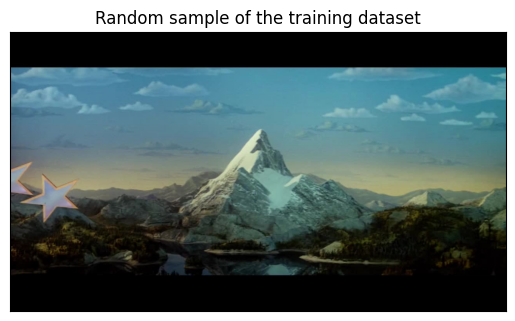

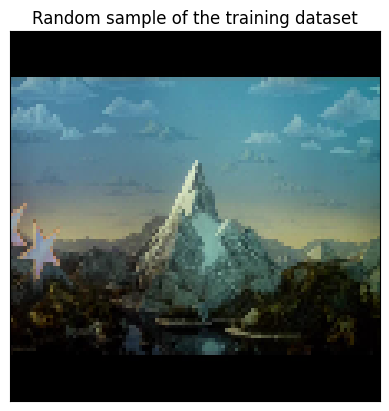

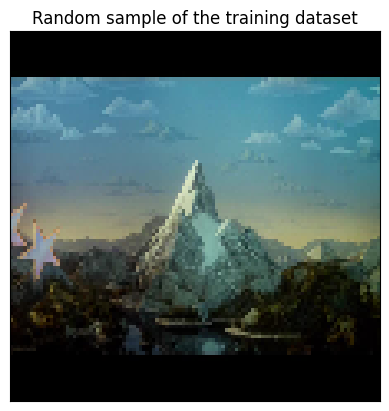

In [15]:
path = 'frame_001_001'
plot_images(path)